## Pacotes

In [60]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

from datetime import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as image
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

logo = "../figs/Cecon_Logo.png"
logo = image.imread(logo)

file_path = '../data/Setor Externo/'
image_path = '../figs/SetorExterno/'
corona = '2020-03-18' # More than 60 cases in Brazil
start_year = "2019-01-01"

# Balança comercial brasileira

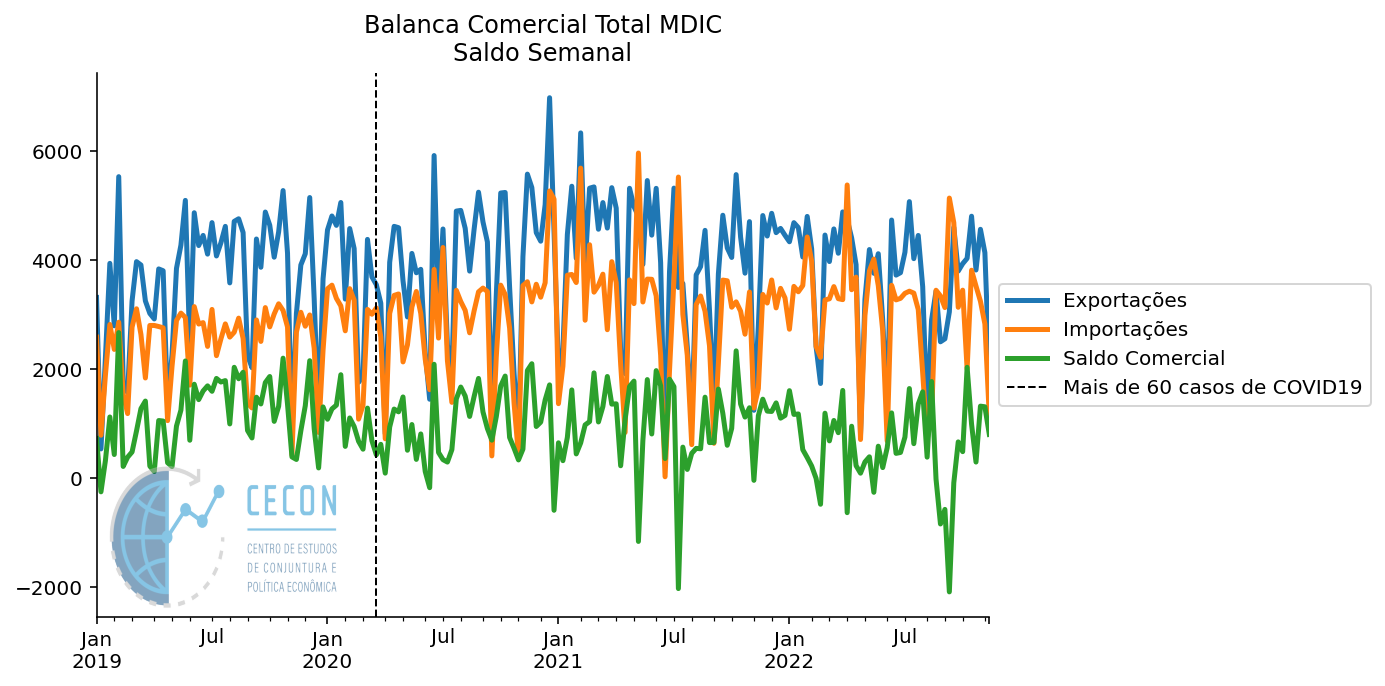

,Exportações,Exportações Média diária,Importações,Importações Média diária,Saldo Comercial,Saldo Comercial Média diária
,,,,,,
2019-01-06,3313.14,662.628,2585.99,517.197,727.156,145.431
2019-01-13,535.529,535.529,786.588,786.588,-251.059,-251.059
2019-01-20,2205.96,735.32,1885.52,628.506,320.442,106.814
2019-01-27,3937.86,787.573,2816.66,563.332,1121.2,224.24
2019-02-03,2792.11,698.028,2359.53,589.882,432.583,108.146
...,...,...,...,...,...,...
2022-10-16,4801.78,960.357,3811.71,762.342,990.072,198.014
2022-10-23,3815.56,763.112,3520.89,704.179,294.666,58.9332
2022-10-30,4561.79,912.359,3242.08,648.415,1319.72,263.944


In [2]:
file_name = 'Balanca_Comercial_Total_MDIC'
sheet = "Saldo Semanal"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True, # Check data-parser -> %m/%Y not %m/%d
    index_col=[0], 
    skiprows=10,
)[0:]
df.index = pd.date_range( # Check for NaN
    start = '1999-05-01',
    periods=df.shape[0],
    #end='2020-05-31',
    freq='W', 
    #periods=(1241-12)
    )
df = df[start_year:]
df.index.name = ''
df.drop(['Semana Referência', 'Número dias úteis'], axis='columns', inplace=True)
df.columns = [
    "Exportações",
    "Exportações Média diária",
    "Importações",
    "Importações Média diária",
    "Saldo Comercial",
    "Saldo Comercial Média diária",
]

fig, ax = plt.subplots(figsize=(8,5))
df[['Exportações', 'Importações', 'Saldo Comercial']].plot(
    title = file_name.replace('_', ' ')+'\n' + sheet,
    ax = ax,
    lw = 2.5
)
ax.axvline(x = corona, color='black', ls='--', lw=1, label='Mais de 60 casos de COVID19')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2 = plt.axes([0.135,0.135,0.2,0.2])
ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')

sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df

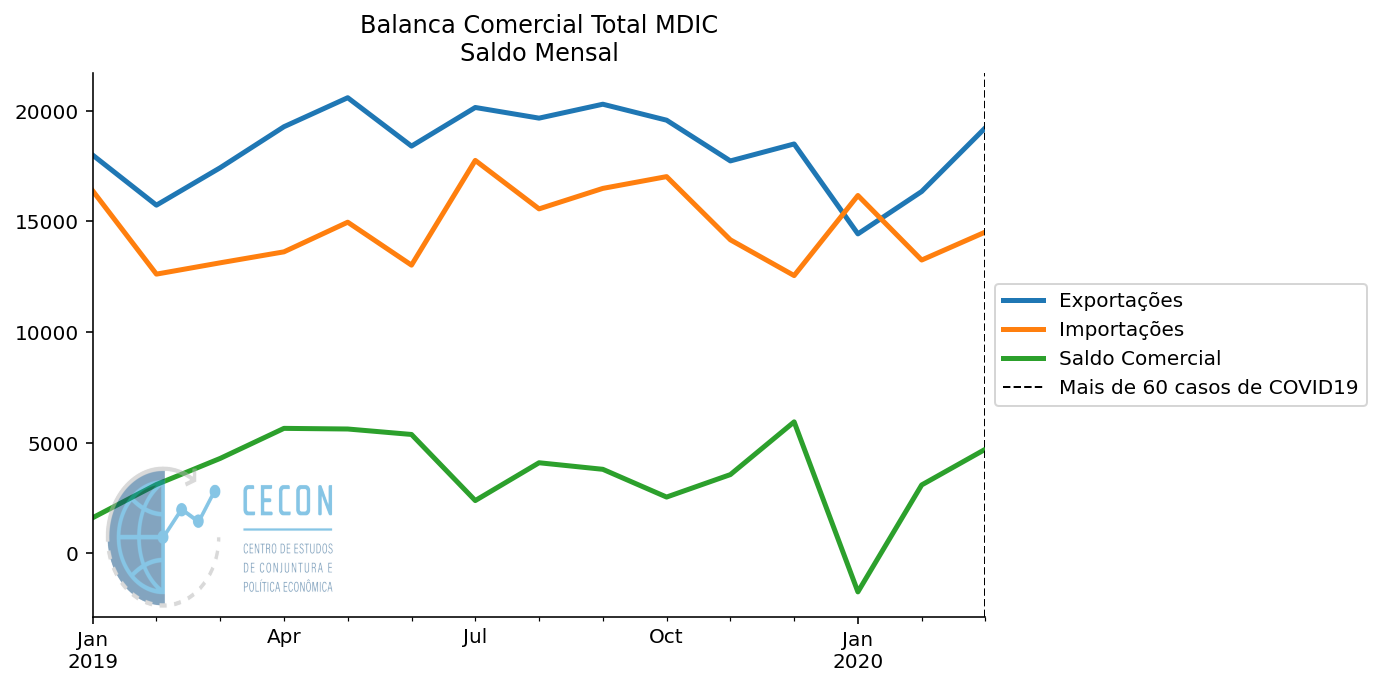

,Exportações,Importações,Saldo Comercial,DU
,,,,
2019-01-01,18001.907016,16387.829960,1614.077056,22
2019-02-01,15737.375000,12621.762837,3115.612163,20
2019-03-01,17428.698480,13132.998803,4295.699677,19
2019-04-01,19281.734438,13628.618723,5653.115715,21
2019-05-01,20592.409187,14968.051867,5624.357320,22
2019-06-01,18406.010533,13028.629358,5377.381175,19
2019-07-01,20150.883169,17759.476963,2391.406206,23
2019-08-01,19669.525248,15569.921736,4099.603512,22
2019-09-01,20298.407777,16495.171374,3803.236403,21


In [3]:
file_name = 'Balanca_Comercial_Total_MDIC'
sheet = "Saldo Mensal"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True,
    index_col=[0], 
    skiprows=11, 
    thousands='.'
)[0:]
df = df.apply(pd.to_numeric)
# df.index = pd.date_range(
#     start = '1999-05-01',
#     periods=df.shape[0],
#     #end='2020-05-31',
#     freq='M', 
#     #periods=(1241-12)
#     )
df.index = pd.to_datetime(df.index, format="%Y-%m")
df = df[start_year:]
df.index.name = ''


fig, ax = plt.subplots(figsize=(8,5))
df.drop(['DU'], axis='columns').plot(
    title = file_name.replace('_', ' ')+'\n' + sheet,
    ax = ax,
    lw = 2.5
)
ax.axvline(x = corona, color='black', ls='--', lw=1, label='Mais de 60 casos de COVID19')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2 = plt.axes([0.135,0.135,0.2,0.2])
ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')

sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df

# Exportação de Manufaturados e importação de matéria-prima

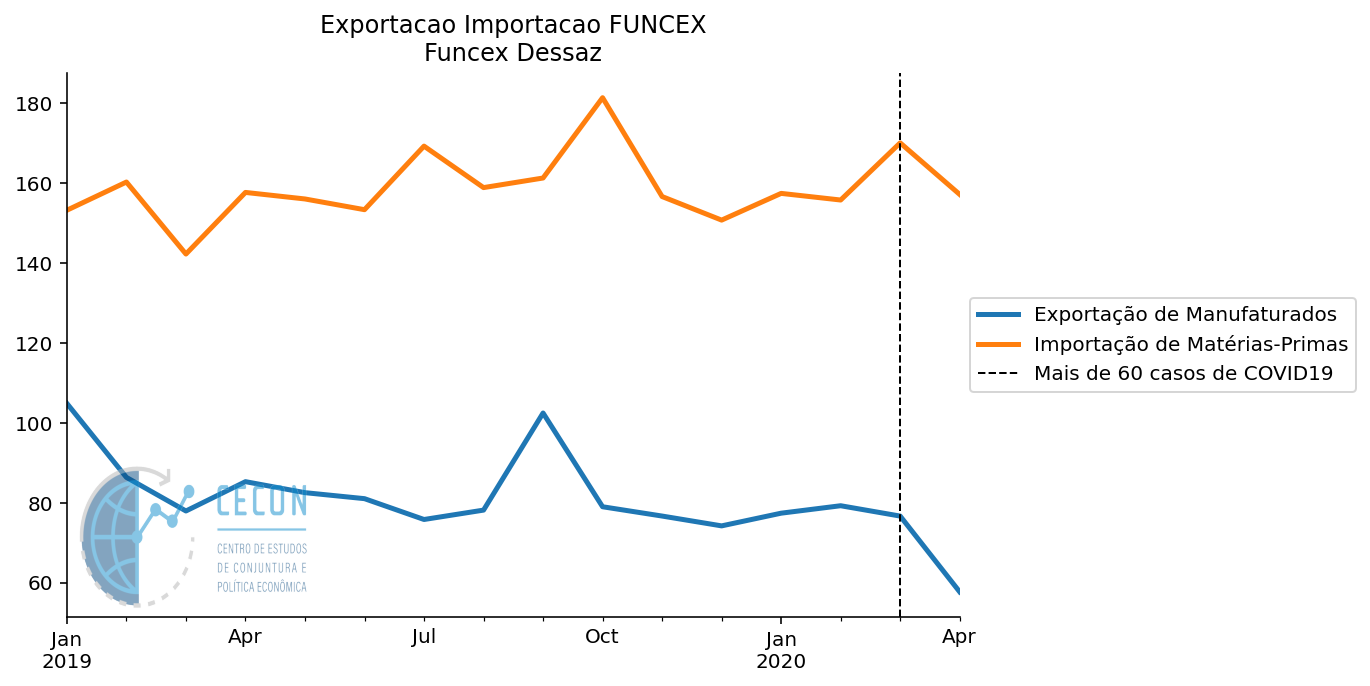

,Exportação de Manufaturados,Importação de Matérias-Primas
,,
2019-01-01,104.865027,153.198566
2019-02-01,86.369424,160.250099
2019-03-01,77.964297,142.239788
2019-04-01,85.298585,157.651361
2019-05-01,82.547766,156.015875
2019-06-01,81.046367,153.333138
2019-07-01,75.834909,169.232335
2019-08-01,78.182193,158.859013
2019-09-01,102.471425,161.254925


In [4]:
file_name = 'Exportacao_Importacao_FUNCEX'
sheet = "Funcex Dessaz"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True,
    index_col=[0], 
    skiprows=11, 
)[0:]
df = df.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index, format="%Y-%m")
df = df[start_year:]
df.index.name = ''


fig, ax = plt.subplots(figsize=(8,5))
df.plot(
    title = file_name.replace('_', ' ')+'\n' + sheet,
    ax = ax,
    lw = 2.5
)
ax.axvline(x = corona, color='black', ls='--', lw=1, label='Mais de 60 casos de COVID19')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2 = plt.axes([0.135,0.135,0.2,0.2])
ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')

sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df

# Conta Corrente Brasileira (%PIB)

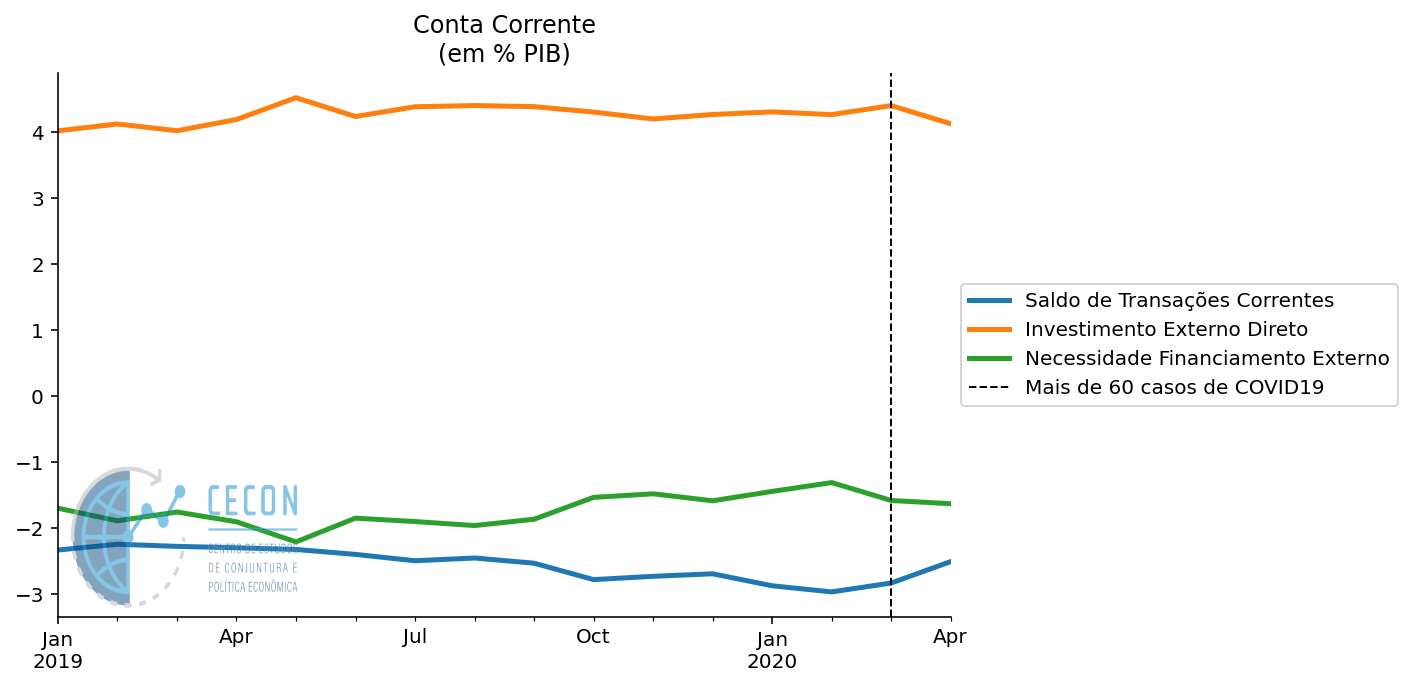

,STC Mensal,STC últimos 12 meses,Saldo de Transações Correntes,IED Mensal,IED últimos 12 meses,Investimento Externo Direto,NFE Mensal,NFE últimos 12 meses,Necessidade Financiamento Externo,PIB últimos 12 meses
,,,,,,,,,,
2019-01-01,-9045.454004,-43807.076598,-2.328878,5828.068007,75683.816779,4.023513,3217.385996,-31876.740181,-1.694636,1881038
2019-02-01,-3333.983801,-42121.501171,-2.241234,7682.072351,77572.649005,4.127546,-4348.088550,-35451.147834,-1.886312,1879389
2019-03-01,-2663.723895,-42515.793019,-2.273050,4777.026076,75292.258092,4.025400,-2113.302182,-32776.465074,-1.752350,1870429
2019-04-01,-1909.978960,-42787.545184,-2.294500,5107.333927,78231.375619,4.195191,-3197.354968,-35443.830435,-1.900691,1864787
2019-05-01,-1385.406988,-43312.119783,-2.319877,8264.168432,84491.414797,4.525515,-6878.761443,-41179.295015,-2.205639,1867001
2019-06-01,-2659.441765,-44521.316139,-2.395002,574.119361,78827.043710,4.240462,2085.322404,-34305.727571,-1.845460,1858926
2019-07-01,-9160.361949,-46234.487839,-2.491274,6123.249241,81445.287717,4.388554,3037.112708,-35210.799878,-1.897280,1855857
2019-08-01,-2674.466300,-45292.302293,-2.449212,10002.025512,81492.738316,4.406776,-7327.559212,-36200.436023,-1.957563,1849260
2019-09-01,-2738.780834,-46703.806083,-2.528147,6953.278859,81102.711576,4.390212,-4214.498025,-34398.905493,-1.862065,1847353


In [5]:
file_name = 'Conta_Corrente_pct_PIB_Bacen_BPM6'
sheet = "Conta Corrente"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True,
    index_col=[0], 
    skiprows=11, 
    na_values='-' 
)[0:]
df = df.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index, format="%Y-%m")
df = df[start_year:]
df.index.name = ''
df.columns = [
    "STC Mensal", "STC últimos 12 meses", "Saldo de Transações Correntes",
    "IED Mensal", "IED últimos 12 meses", "Investimento Externo Direto",
    "NFE Mensal", "NFE últimos 12 meses", "Necessidade Financiamento Externo",
    "PIB últimos 12 meses"
]
fig, ax = plt.subplots(figsize=(8,5))
df[[
    "Saldo de Transações Correntes",
    "Investimento Externo Direto",
    "Necessidade Financiamento Externo"
]].plot(
    title = sheet + "\n(em % PIB)",
    ax = ax,
    lw = 2.5
)
ax.axvline(x = corona, color='black', ls='--', lw=1, label='Mais de 60 casos de COVID19')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2 = plt.axes([0.135,0.135,0.2,0.2])
ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')

sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df

# Balança comercial por país (mensal)

## Exportações

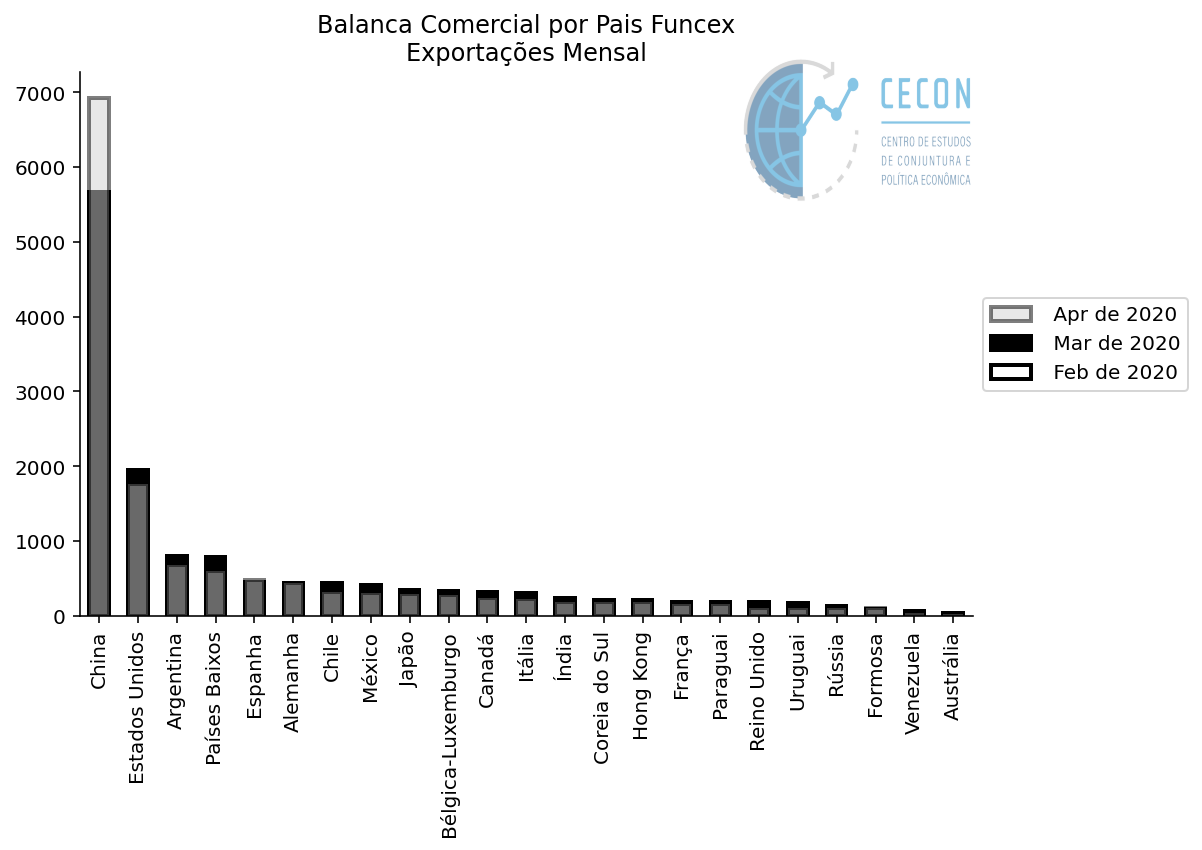

,Estados Unidos,Canadá,México,Alemanha,Bélgica-Luxemburgo,Espanha,França,Itália,Países Baixos,Reino Unido,...,Chile,Venezuela,Japão,China,Coreia do Sul,Formosa,Hong Kong,Austrália,Rússia,Índia
,,,,,,,,,,,,,,,,,,,,,
1989-01-01,659.778906,148.940000,23.240000,131.750000,61.410000,40.600000,67.220000,150.540000,193.160000,82.660000,...,48.770000,43.550000,205.370000,54.270000,34.270000,30.530000,20.930000,NaN,NaN,NaN
1989-02-01,669.903651,47.190000,31.080000,122.310000,56.800000,37.770000,68.250000,101.770000,159.190000,73.980000,...,36.080000,25.190000,117.970000,42.590000,22.660000,17.200000,21.250000,NaN,NaN,NaN
1989-03-01,657.723107,49.440000,30.770000,128.810000,102.450000,45.900000,107.250000,150.200000,225.880000,80.920000,...,61.340000,24.370000,185.310000,39.180000,31.260000,40.900000,43.060000,NaN,NaN,NaN
1989-04-01,570.561394,58.550000,34.170000,103.520000,80.700000,35.560000,56.880000,139.350000,182.080000,114.060000,...,49.300000,23.880000,129.460000,53.550000,28.280000,35.910000,26.000000,NaN,NaN,NaN
1989-05-01,631.836527,70.360000,32.460000,142.110000,61.150000,55.250000,51.520000,173.510000,226.390000,79.860000,...,51.030000,21.370000,197.650000,56.490000,20.020000,41.520000,28.880000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,2635.204884,264.880479,383.047042,326.198675,284.717776,284.679430,214.165828,184.149169,519.566531,250.463740,...,463.731571,72.457082,620.731702,5604.367982,276.836434,134.131532,211.136049,50.568687,92.749887,222.201700
2020-01-01,1623.014681,305.064627,237.689786,301.520003,208.773177,281.227195,194.031440,191.262293,509.117799,241.430732,...,309.635562,59.713416,352.492598,3680.537122,202.549219,110.834854,183.613795,33.518930,125.987989,249.852859
2020-02-01,1659.186447,226.943486,278.215206,346.276121,235.981901,418.035610,169.411583,204.259137,789.170167,141.940446,...,288.774279,43.032492,276.166134,4592.116657,199.514182,66.134260,191.275871,34.061112,115.408369,204.204864


In [37]:
file_name = 'Balanca_Comercial_por_Pais_Funcex'
sheet = "Exportações Mensal"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True,
    index_col=[0], 
    skiprows=11, 
    na_values='-' 
)[0:]
df = df.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index, format="%Y-%m")
df.index.name = ''
principais = df.iloc[-1].sort_values(ascending=False).index[:7].to_list()
outros = df.iloc[-1].sort_values(ascending=False).index[7:].to_list()

fig, ax = plt.subplots(figsize=(8,5))
df.iloc[-1].sort_values(ascending=False).plot(
    title = file_name.replace("_", " ") + "\n" + sheet,
    ax = ax,
    kind='bar', 
    color='lightgray',
    edgecolor='black',
    lw=2, 
    zorder=1,
    stacked=False,
    label=f"{df.index[-1]: %b de %Y}",
    alpha=.5
)
df.iloc[-2].sort_values(ascending=False).plot(
    title = file_name.replace("_", " ") + "\n" + sheet,
    ax = ax,
    kind='bar', 
    edgecolor='black',
    lw=2, 
    zorder=0,
    color='black',
    stacked=False,
    label=f"{df.index[-2]: %b de %Y}"
)
df.iloc[-3].sort_values(ascending=False).plot(
    title = file_name.replace("_", " ") + "\n" + sheet,
    ax = ax,
    kind='bar', 
    edgecolor='black',
    lw=2, 
    zorder=-1,
    color='white',
    stacked=False,
    label=f"{df.index[-3]: %b de %Y}"
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2 = plt.axes([0.7,0.7,0.2,0.2])
ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')

sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df

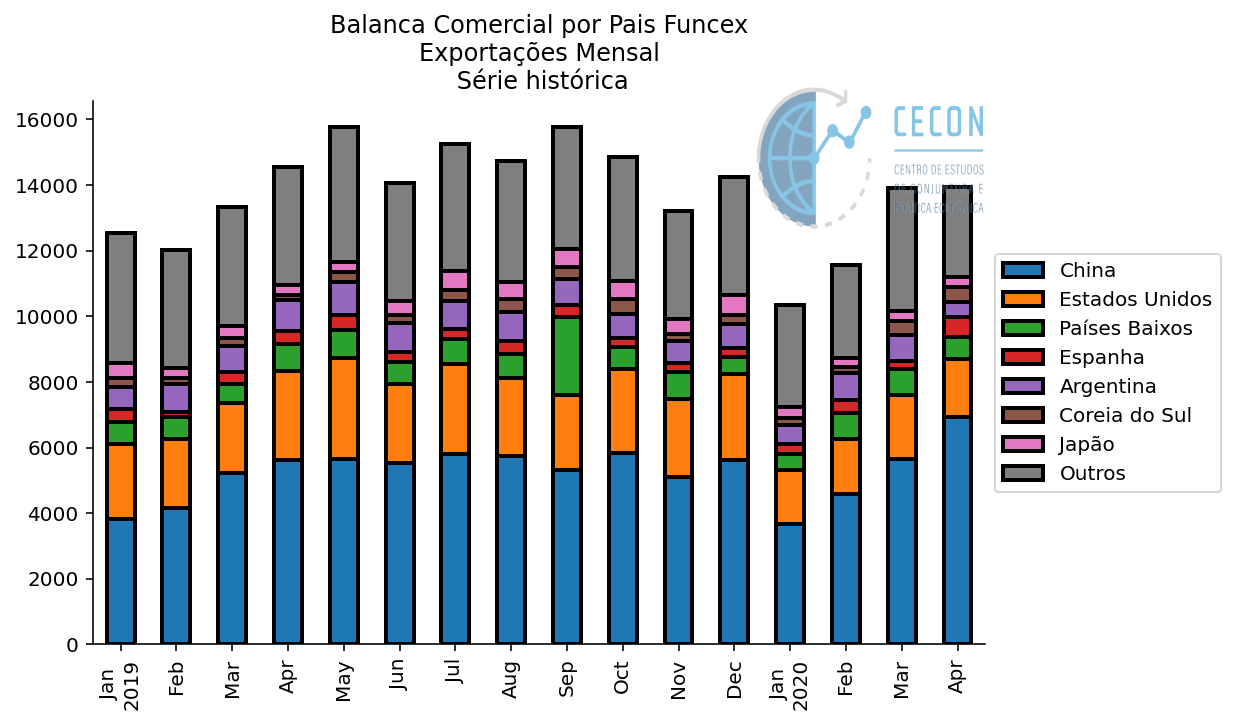

,China,Estados Unidos,Países Baixos,Espanha,Argentina,Coreia do Sul,Japão,Outros
,,,,,,,,
1989-01-01,54.270000,659.778906,193.160000,40.600000,65.190000,34.270000,205.370000,855.000000
1989-02-01,42.590000,669.903651,159.190000,37.770000,55.610000,22.660000,117.970000,629.970000
1989-03-01,39.180000,657.723107,225.880000,45.900000,75.840000,31.260000,185.310000,867.740000
1989-04-01,53.550000,570.561394,182.080000,35.560000,70.630000,28.280000,129.460000,772.530000
1989-05-01,56.490000,631.836527,226.390000,55.250000,52.830000,20.020000,197.650000,805.150000
...,...,...,...,...,...,...,...,...
2019-12-01,5604.367982,2635.204884,519.566531,284.679430,711.226722,276.836434,620.731702,3601.442706
2020-01-01,3680.537122,1623.014681,509.117799,281.227195,593.239104,202.549219,352.492598,3090.947129
2020-02-01,4592.116657,1659.186447,789.170167,418.035610,801.790376,199.514182,276.166134,2835.218008


In [77]:
file_name = 'Balanca_Comercial_por_Pais_Funcex'
sheet = "Exportações Mensal"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True,
    index_col=[0], 
    skiprows=11, 
    na_values='-' 
)[0:]
df = df.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index, format="%Y-%m")
df.index.name = ''
df["Outros"] = df[outros].sum(axis=1)
df = df[principais + ["Outros"]]

fig, ax = plt.subplots(figsize=(8,5))
df[start_year:].plot(
    title = file_name.replace("_", " ") + "\n" + sheet + "\n Série histórica",
    ax = ax,
    kind='bar', 
    edgecolor='black',
    lw=2, 
    stacked=True,
)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month
ax.set_xticklabels(map(lambda x: line_format(x), df[start_year:].index))
# Define the date format
ax2 = plt.axes([0.7,0.7,0.2,0.2])


ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')


sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + "_SerieHistorica" +  '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df

## Importações

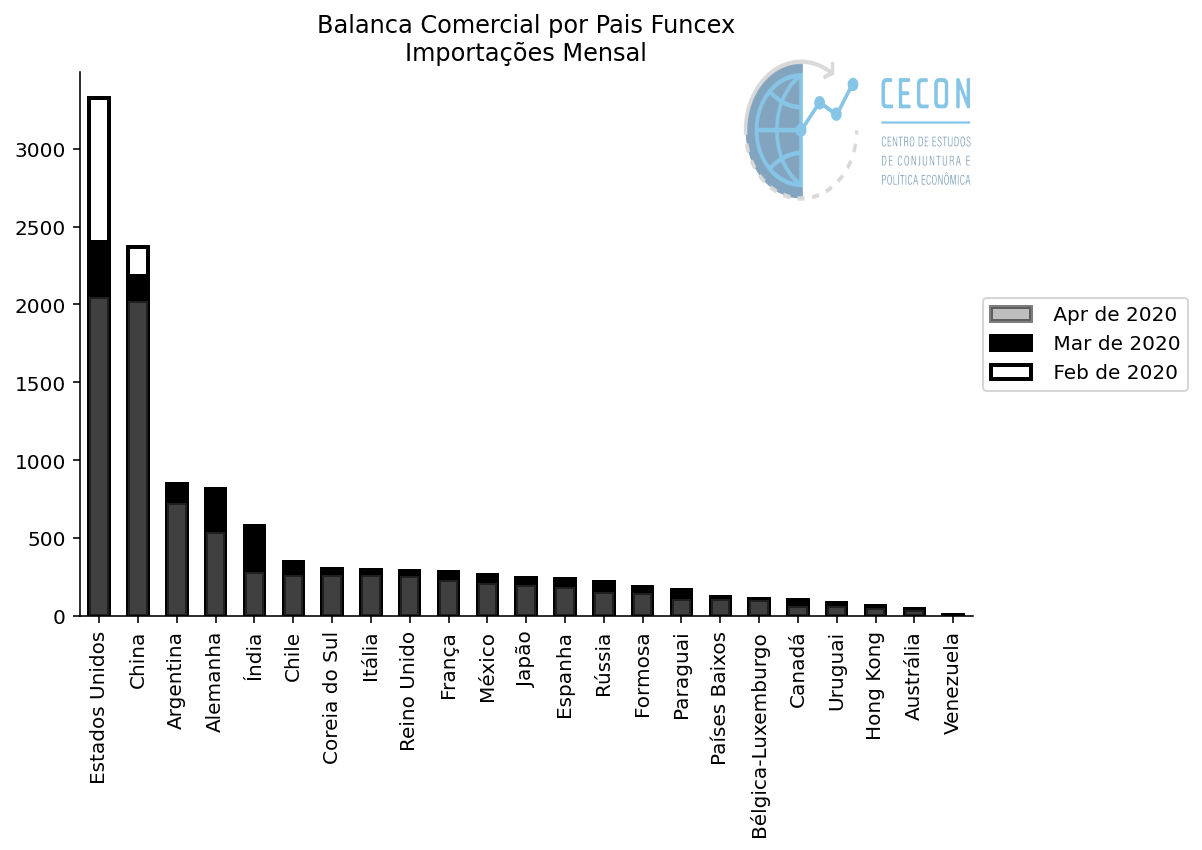

,Estados Unidos,Canadá,México,Alemanha,Bélgica-Luxemburgo,Espanha,França,Itália,Países Baixos,Reino Unido,...,Chile,Venezuela,Japão,China,Coreia do Sul,Formosa,Hong Kong,Austrália,Rússia,Índia
,,,,,,,,,,,,,,,,,,,,,
1989-01-01,217.409060,18.730000,13.640000,103.860000,9.040000,6.720000,29.250000,28.210000,18.220000,35.370000,...,26.030000,11.330000,87.190000,2.440000,2.280000,1.880000,4.180000,NaN,NaN,NaN
1989-02-01,253.369135,26.500000,4.750000,108.600000,8.950000,7.280000,39.070000,32.070000,15.040000,29.130000,...,20.110000,19.610000,109.840000,12.810000,2.440000,1.710000,10.690000,NaN,NaN,NaN
1989-03-01,257.521731,18.460000,12.650000,120.580000,8.360000,11.490000,44.780000,28.860000,21.320000,27.430000,...,35.750000,15.390000,103.130000,2.630000,2.970000,2.800000,3.910000,NaN,NaN,NaN
1989-04-01,254.477169,35.230000,6.300000,106.970000,9.470000,4.070000,43.420000,33.460000,13.810000,23.220000,...,23.820000,12.150000,98.450000,2.050000,3.530000,2.070000,3.760000,NaN,NaN,NaN
1989-05-01,297.739087,39.090000,8.780000,122.690000,19.070000,8.710000,43.620000,26.440000,13.990000,34.880000,...,49.550000,18.140000,98.830000,2.160000,2.780000,4.240000,5.380000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,2119.499665,120.766417,311.891151,726.530730,91.403934,205.247821,241.108092,301.382402,223.146514,157.162634,...,247.140913,5.009957,264.089669,2608.262917,266.942501,148.450535,48.392926,66.160920,235.335325,314.368809
2020-01-01,2464.534531,131.577478,361.238192,1017.555627,127.346130,235.865343,258.199453,359.535692,148.606130,196.640554,...,231.862745,1.663570,353.892367,5059.392826,385.627983,194.724443,92.044965,73.751766,189.956869,445.989096
2020-02-01,3325.272760,82.331832,224.312495,651.791093,90.467045,182.732525,236.561872,270.993779,111.386356,265.050322,...,292.515091,2.593853,216.507481,2367.443387,281.798542,134.175874,47.918406,33.722211,160.510111,335.556334


In [78]:
file_name = 'Balanca_Comercial_por_Pais_Funcex'
sheet = "Importações Mensal"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True,
    index_col=[0], 
    skiprows=11, 
    na_values='-' 
)[0:]
df = df.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index, format="%Y-%m")
df.index.name = ''
principais = df.iloc[-1].sort_values(ascending=False).index[:7].to_list()
outros = df.iloc[-1].sort_values(ascending=False).index[7:].to_list()

fig, ax = plt.subplots(figsize=(8,5))
df.iloc[-1].sort_values(ascending=False).plot(
    title = file_name.replace("_", " ") + "\n" + sheet,
    ax = ax,
    kind='bar', 
    color='gray',
    edgecolor='black',
    lw=2, 
    zorder=1,
    stacked=False,
    label=f"{df.index[-1]: %b de %Y}",
    alpha=.5
)
df.iloc[-2].sort_values(ascending=False).plot(
    title = file_name.replace("_", " ") + "\n" + sheet,
    ax = ax,
    kind='bar', 
    edgecolor='black',
    lw=2, 
    zorder=0,
    color='black',
    stacked=False,
    label=f"{df.index[-2]: %b de %Y}"
)
df.iloc[-3].sort_values(ascending=False).plot(
    title = file_name.replace("_", " ") + "\n" + sheet,
    ax = ax,
    kind='bar', 
    edgecolor='black',
    lw=2, 
    zorder=-1,
    color='white',
    stacked=False,
    label=f"{df.index[-3]: %b de %Y}"
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2 = plt.axes([0.7,0.7,0.2,0.2])
ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')

sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df

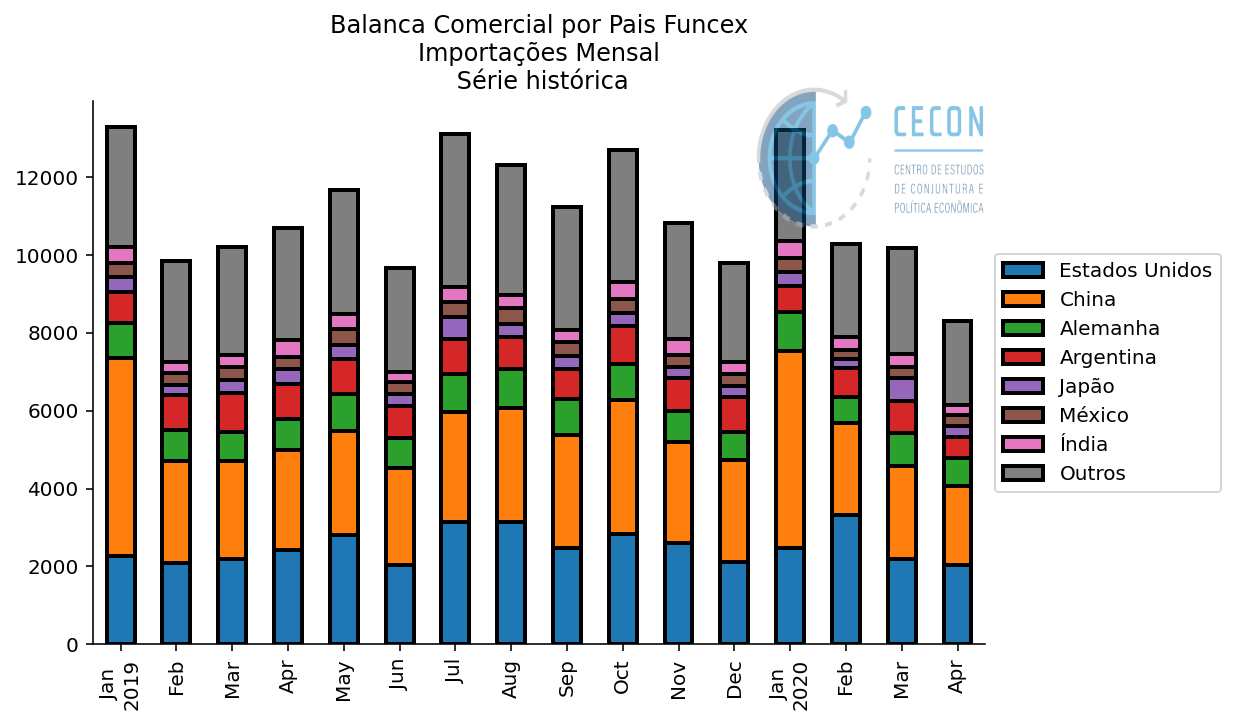

,Estados Unidos,China,Alemanha,Argentina,Japão,México,Índia,Outros
,,,,,,,,
1989-01-01,217.409060,2.440000,103.860000,45.840000,87.190000,13.640000,NaN,225.970000
1989-02-01,253.369135,12.810000,108.600000,68.880000,109.840000,4.750000,NaN,243.560000
1989-03-01,257.521731,2.630000,120.580000,57.260000,103.130000,12.650000,NaN,264.300000
1989-04-01,254.477169,2.050000,106.970000,66.320000,98.450000,6.300000,NaN,261.300000
1989-05-01,297.739087,2.160000,122.690000,79.810000,98.830000,8.780000,NaN,343.630000
...,...,...,...,...,...,...,...,...
2019-12-01,2119.499665,2608.262917,726.530730,904.874225,264.089669,311.891151,314.368809,2539.980564
2020-01-01,2464.534531,5059.392826,1017.555627,661.145034,353.892367,361.238192,445.989096,2837.450920
2020-02-01,3325.272760,2367.443387,651.791093,757.393917,216.507481,224.312495,335.556334,2395.890059


In [79]:
file_name = 'Balanca_Comercial_por_Pais_Funcex'
sheet = "Importações Mensal"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True,
    index_col=[0], 
    skiprows=11, 
    na_values='-' 
)[0:]
df = df.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index, format="%Y-%m")
df.index.name = ''
df["Outros"] = df[outros].sum(axis=1)
df = df[principais + ["Outros"]]

fig, ax = plt.subplots(figsize=(8,5))
df[start_year:].plot(
    title = file_name.replace("_", " ") + "\n" + sheet + "\n Série histórica",
    ax = ax,
    kind='bar', 
    edgecolor='black',
    lw=2, 
    stacked=True,
)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month
ax.set_xticklabels(map(lambda x: line_format(x), df[start_year:].index))
# Define the date format
ax2 = plt.axes([0.7,0.7,0.2,0.2])


ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')


sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + "_SerieHistorica" +  '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df

## Saldo Comercial

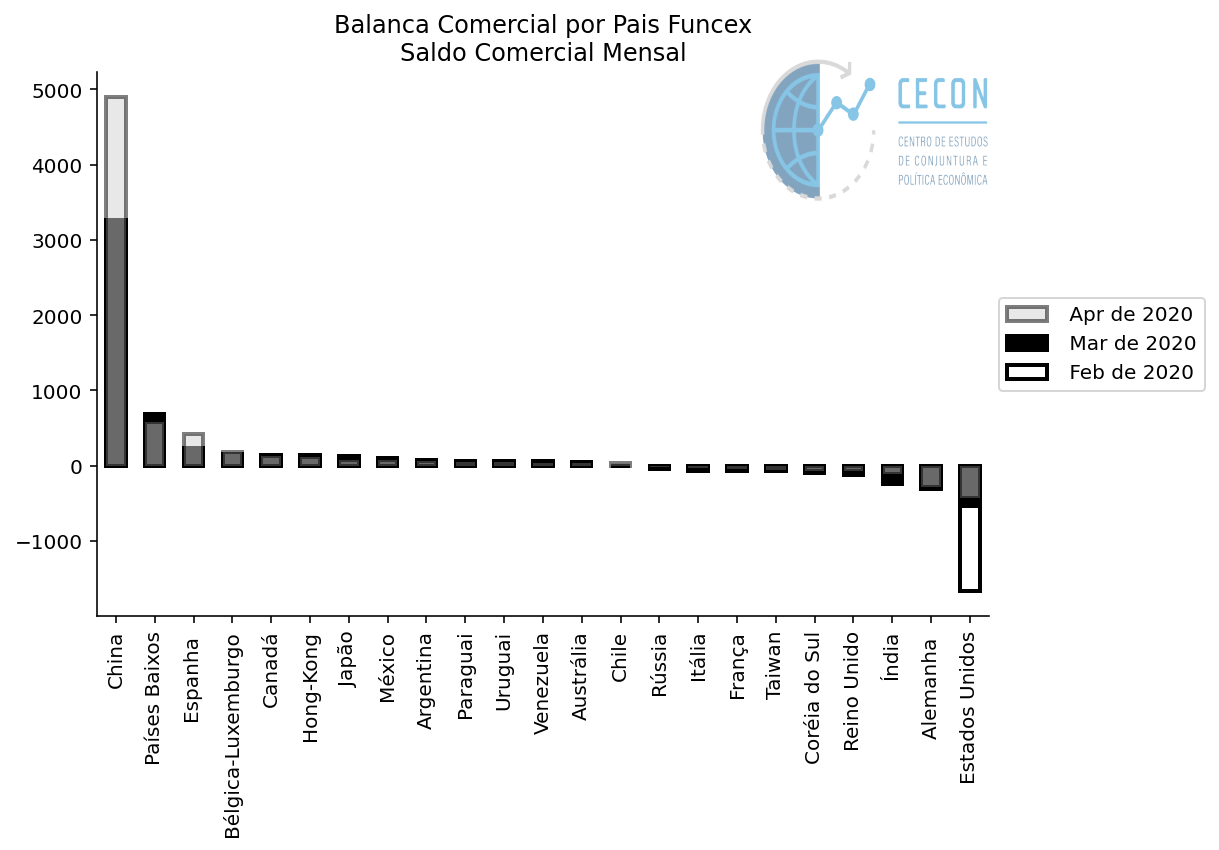

,Estados Unidos,Canadá,México,Alemanha,Bélgica-Luxemburgo,Espanha,França,Itália,Países Baixos,Reino Unido,...,Chile,Venezuela,Japão,China,Coréia do Sul,Taiwan,Hong-Kong,Austrália,Rússia,Índia
,,,,,,,,,,,,,,,,,,,,,
1989-01-01,451.210000,130.210000,9.600000,27.890000,52.370000,33.880000,37.970000,122.330000,174.940000,47.290000,...,22.740000,32.220000,118.180000,51.830000,31.990000,28.650000,16.750000,NaN,NaN,NaN
1989-02-01,424.300000,20.690000,26.330000,13.710000,47.850000,30.490000,29.180000,69.700000,144.150000,44.850000,...,15.970000,5.580000,8.130000,29.780000,20.220000,15.490000,10.560000,NaN,NaN,NaN
1989-03-01,408.580000,30.980000,18.120000,8.230000,94.090000,34.410000,62.470000,121.340000,204.560000,53.490000,...,25.590000,8.980000,82.180000,36.550000,28.290000,38.100000,39.150000,NaN,NaN,NaN
1989-04-01,329.770000,23.320000,27.870000,-3.450000,71.230000,31.490000,13.460000,105.890000,168.270000,90.840000,...,25.480000,11.730000,31.010000,51.500000,24.750000,33.840000,22.240000,NaN,NaN,NaN
1989-05-01,345.180000,31.270000,23.680000,19.420000,42.080000,46.540000,7.900000,147.070000,212.400000,44.980000,...,1.480000,3.230000,98.820000,54.330000,17.240000,37.280000,23.500000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,515.705219,144.114062,71.155891,-400.332055,193.313842,79.431609,-26.942264,-117.233233,296.420017,93.301106,...,216.590658,67.447125,356.642033,2996.105065,9.893933,-14.319003,162.743123,-15.592233,-142.585438,-92.167109
2020-01-01,-841.519850,173.487149,-123.548406,-716.035624,81.427047,45.361852,-64.168013,-168.273399,360.511669,44.790178,...,77.772817,58.049846,-1.399769,-1378.855704,-183.078764,-83.889589,91.568830,-40.232836,-63.968880,-196.136237
2020-02-01,-1666.086313,144.611654,53.902711,-305.514972,145.514856,235.303085,-67.150289,-66.734642,677.783811,-123.109876,...,-3.740812,40.438639,59.658653,2224.673270,-82.284360,-68.041614,143.357465,0.338901,-45.101742,-131.351470


In [80]:
file_name = 'Balanca_Comercial_por_Pais_Funcex'
sheet = "Saldo Comercial Mensal"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True,
    index_col=[0], 
    skiprows=11, 
    na_values='-' 
)[0:]
df = df.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index, format="%Y-%m")
df.index.name = ''
principais = df.iloc[-1].sort_values(ascending=False).index[:7].to_list()
outros = df.iloc[-1].sort_values(ascending=False).index[7:].to_list()


fig, ax = plt.subplots(figsize=(8,5))
df.iloc[-1].sort_values(ascending=False).plot(
    title = file_name.replace("_", " ") + "\n" + sheet,
    ax = ax,
    kind='bar', 
    color='lightgray',
    edgecolor='black',
    lw=2, 
    zorder=1,
    stacked=False,
    label=f"{df.index[-1]: %b de %Y}",
    alpha=.5
)
df.iloc[-2].sort_values(ascending=False).plot(
    title = file_name.replace("_", " ") + "\n" + sheet,
    ax = ax,
    kind='bar', 
    edgecolor='black',
    lw=2, 
    zorder=0,
    color='black',
    stacked=False,
    label=f"{df.index[-2]: %b de %Y}"
)
df.iloc[-3].sort_values(ascending=False).plot(
    title = file_name.replace("_", " ") + "\n" + sheet,
    ax = ax,
    kind='bar', 
    edgecolor='black',
    lw=2, 
    zorder=-1,
    color='white',
    stacked=False,
    label=f"{df.index[-3]: %b de %Y}"
)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2 = plt.axes([0.7,0.7,0.2,0.2])
ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')

sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df

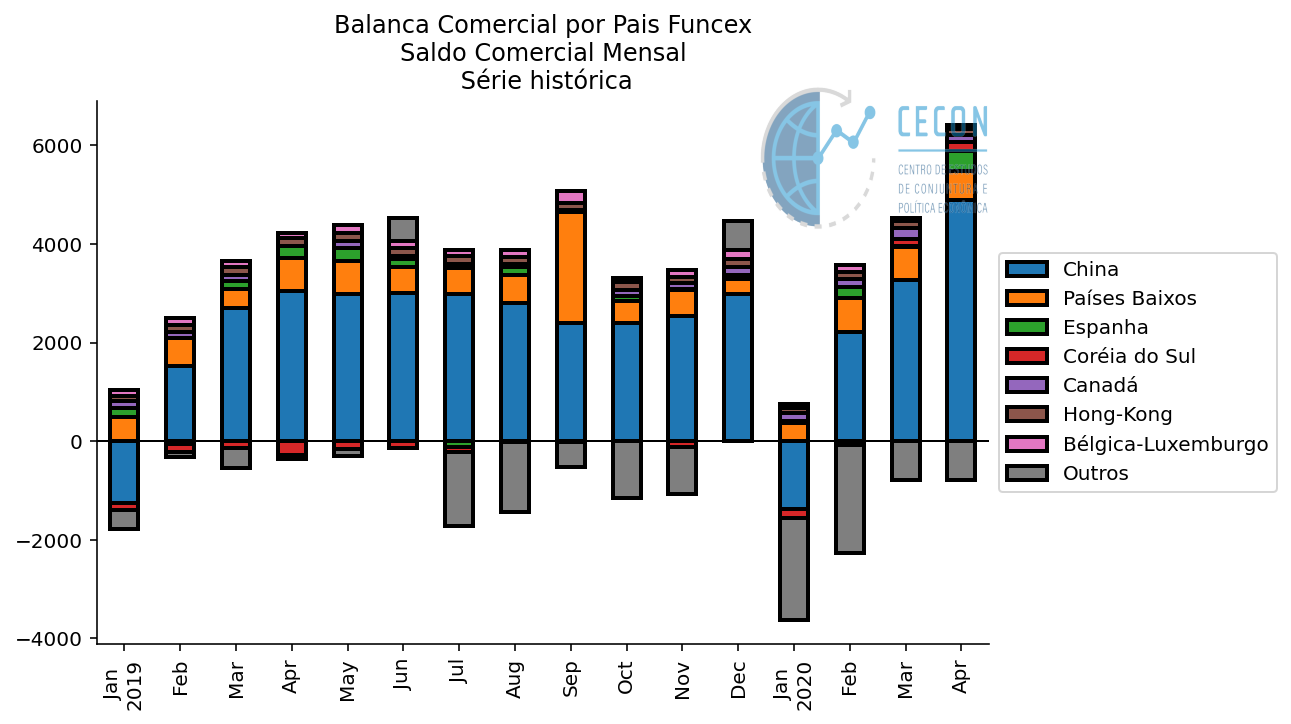

,China,Países Baixos,Espanha,Coréia do Sul,Canadá,Hong-Kong,Bélgica-Luxemburgo,Outros
,,,,,,,,
1989-01-01,51.830000,174.940000,33.880000,31.990000,130.210000,16.750000,52.370000,928.160000
1989-02-01,29.780000,144.150000,30.490000,20.220000,20.690000,10.560000,47.850000,637.880000
1989-03-01,36.550000,204.560000,34.410000,28.290000,30.980000,39.150000,94.090000,851.110000
1989-04-01,51.500000,168.270000,31.490000,24.750000,23.320000,22.240000,71.230000,667.670000
1989-05-01,54.330000,212.400000,46.540000,17.240000,31.270000,23.500000,42.080000,675.700000
...,...,...,...,...,...,...,...,...
2019-12-01,2996.105065,296.420017,79.431609,9.893933,144.114062,162.743123,193.313842,582.537010
2020-01-01,-1378.855704,360.511669,45.361852,-183.078764,173.487149,91.568830,81.427047,-2058.495825
2020-02-01,2224.673270,677.783811,235.303085,-82.284360,144.611654,143.357465,145.514856,-2191.929726


In [82]:
file_name = 'Balanca_Comercial_por_Pais_Funcex'
sheet = "Saldo Comercial Mensal"
df = pd.read_excel(
    file_path + file_name + '.xlsx', 
    sheet_name=sheet, 
    parse_dates=True,
    index_col=[0], 
    skiprows=11, 
    na_values='-' 
)[0:]
df = df.apply(pd.to_numeric)
df.index = pd.to_datetime(df.index, format="%Y-%m")
df.index.name = ''
df["Outros"] = df[outros].sum(axis=1)
df = df[principais + ["Outros"]]

fig, ax = plt.subplots(figsize=(8,5))
df[start_year:].plot(
    title = file_name.replace("_", " ") + "\n" + sheet + "\n Série histórica",
    ax = ax,
    kind='bar', 
    edgecolor='black',
    lw=2, 
    stacked=True,
)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axhline(y=0, ls='-', lw=1, color='black')

def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month
ax.set_xticklabels(map(lambda x: line_format(x), df[start_year:].index))
# Define the date format
ax2 = plt.axes([0.7,0.7,0.2,0.2])


ax2.imshow(logo, aspect='auto', zorder=0, alpha=.5)
ax2.axis('off')


sns.despine()
plt.show()

fig.savefig(
    image_path + file_name + "_" + sheet.replace(' ', '') + "_SerieHistorica" +  '.svg',
    dpi = 300, 
    bbox_inches='tight',pad_inches=0
    )

df